In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,split
0,2022-06-22,57.970001,57.970001,57.970001,57.970001,57.046661,0.0,0.222779
1,2022-06-23,58.520000,58.520000,58.520000,58.520000,57.587898,0.0,-0.048429
2,2022-06-24,60.310001,60.310001,60.310001,60.310001,59.349388,0.0,-1.660022
3,2022-06-27,60.130001,60.130001,60.130001,60.130001,59.172256,0.0,0.859856
4,2022-06-28,58.919998,58.919998,58.919998,58.919998,57.981525,0.0,0.656817


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       171 non-null    object 
 1   Open       170 non-null    float64
 2   High       170 non-null    float64
 3   Low        170 non-null    float64
 4   Close      170 non-null    float64
 5   Adj Close  170 non-null    float64
 6   Volume     170 non-null    float64
 7   split      171 non-null    float64
dtypes: float64(7), object(1)
memory usage: 10.8+ KB


In [5]:
data["Close"]=pd.to_numeric(data.Close,errors='coerce')
data = data.dropna()
trainData = data.iloc[:,4:5].values

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 170 entries, 0 to 169
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       170 non-null    object 
 1   Open       170 non-null    float64
 2   High       170 non-null    float64
 3   Low        170 non-null    float64
 4   Close      170 non-null    float64
 5   Adj Close  170 non-null    float64
 6   Volume     170 non-null    float64
 7   split      170 non-null    float64
dtypes: float64(7), object(1)
memory usage: 12.0+ KB


In [7]:
sc = MinMaxScaler(feature_range=(0,1))
trainData = sc.fit_transform(trainData)
trainData.shape

(170, 1)

In [8]:
X_train = []
Y_train = []

for i in range(60,170):
    X_train.append(trainData[i-60:i,0])
    Y_train.append(trainData[i,0])
    
X_train, Y_train = np.array(X_train), np.array(Y_train)

In [9]:
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1], 1))
X_train.shape

(110, 60, 1)

In [19]:
model = Sequential()

model.add(LSTM(units=100, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(units=1))
model.compile(optimizer='adam',loss='mean_squared_error')

In [20]:
hist = model.fit(X_train, Y_train, epochs=20, batch_size=32, verbose=2)

Epoch 1/20
4/4 - 3s - loss: 0.1868 - 3s/epoch - 741ms/step
Epoch 2/20
4/4 - 0s - loss: 0.0808 - 322ms/epoch - 80ms/step
Epoch 3/20
4/4 - 0s - loss: 0.0818 - 322ms/epoch - 81ms/step
Epoch 4/20
4/4 - 0s - loss: 0.0454 - 327ms/epoch - 82ms/step
Epoch 5/20
4/4 - 0s - loss: 0.0335 - 328ms/epoch - 82ms/step
Epoch 6/20
4/4 - 0s - loss: 0.0247 - 325ms/epoch - 81ms/step
Epoch 7/20
4/4 - 0s - loss: 0.0267 - 321ms/epoch - 80ms/step
Epoch 8/20
4/4 - 0s - loss: 0.0226 - 316ms/epoch - 79ms/step
Epoch 9/20
4/4 - 0s - loss: 0.0253 - 317ms/epoch - 79ms/step
Epoch 10/20
4/4 - 0s - loss: 0.0242 - 329ms/epoch - 82ms/step
Epoch 11/20
4/4 - 0s - loss: 0.0239 - 325ms/epoch - 81ms/step
Epoch 12/20
4/4 - 0s - loss: 0.0231 - 327ms/epoch - 82ms/step
Epoch 13/20
4/4 - 0s - loss: 0.0212 - 319ms/epoch - 80ms/step
Epoch 14/20
4/4 - 0s - loss: 0.0215 - 319ms/epoch - 80ms/step
Epoch 15/20
4/4 - 0s - loss: 0.0227 - 317ms/epoch - 79ms/step
Epoch 16/20
4/4 - 0s - loss: 0.0229 - 332ms/epoch - 83ms/step
Epoch 17/20
4/4 - 0

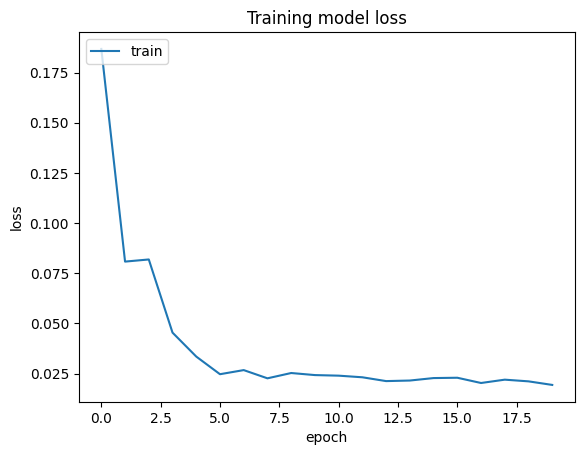

In [21]:
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [22]:
testData = pd.read_csv('test.csv')
testData["Close"] = pd.to_numeric(testData.Close, errors='coerce')
testData = testData.dropna()
testData = testData.iloc[:,4:5]
y_test = testData.iloc[60:,0:].values
inputClosing = testData.iloc[:,0:].values
inputClosing_scaled = sc.transform(inputClosing)
inputClosing_scaled.shape
x_test = []
length = len(testData)
timestep = 60

for i in range(timestep, length):
    x_test.append(inputClosing_scaled[i-timestep:i,0])
    
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))
x_test.shape

(21, 60, 1)

In [23]:
y_pred = model.predict(x_test)
y_pred

1/1 [==============================] - 1s 628ms/step


array([[0.5187049 ],
       [0.5275252 ],
       [0.53566444],
       [0.54266995],
       [0.54828084],
       [0.55247325],
       [0.5553713 ],
       [0.55757725],
       [0.5596544 ],
       [0.5621966 ],
       [0.56562746],
       [0.5701867 ],
       [0.57586014],
       [0.58223367],
       [0.58915764],
       [0.5966549 ],
       [0.6045867 ],
       [0.6130004 ],
       [0.62228644],
       [0.63285553],
       [0.64493567]], dtype=float32)

In [25]:
predicted_price = sc.inverse_transform(y_pred)

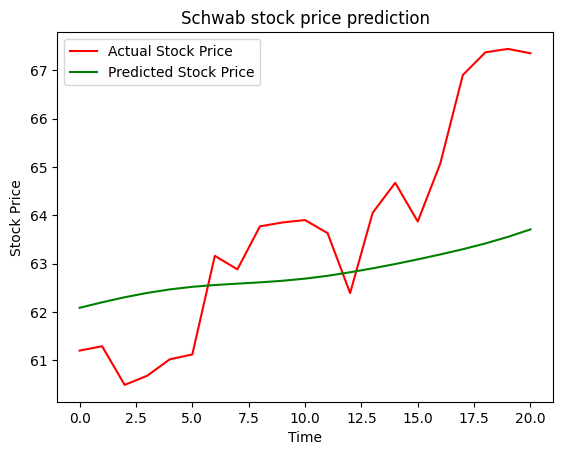

In [26]:
plt.plot(y_test, color = 'red', label = 'Actual Stock Price')
plt.plot(predicted_price, color = 'green', label = 'Predicted Stock Price')
plt.title('Schwab stock price prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()